In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import log10

In [41]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (8, 5)

# Bruteforce

In [84]:
df = pd.read_csv("bruteforce/bruteforce.csv", delimiter = ';')
df['time'] = df.apply(lambda x: x[1:5].median(), axis=1)

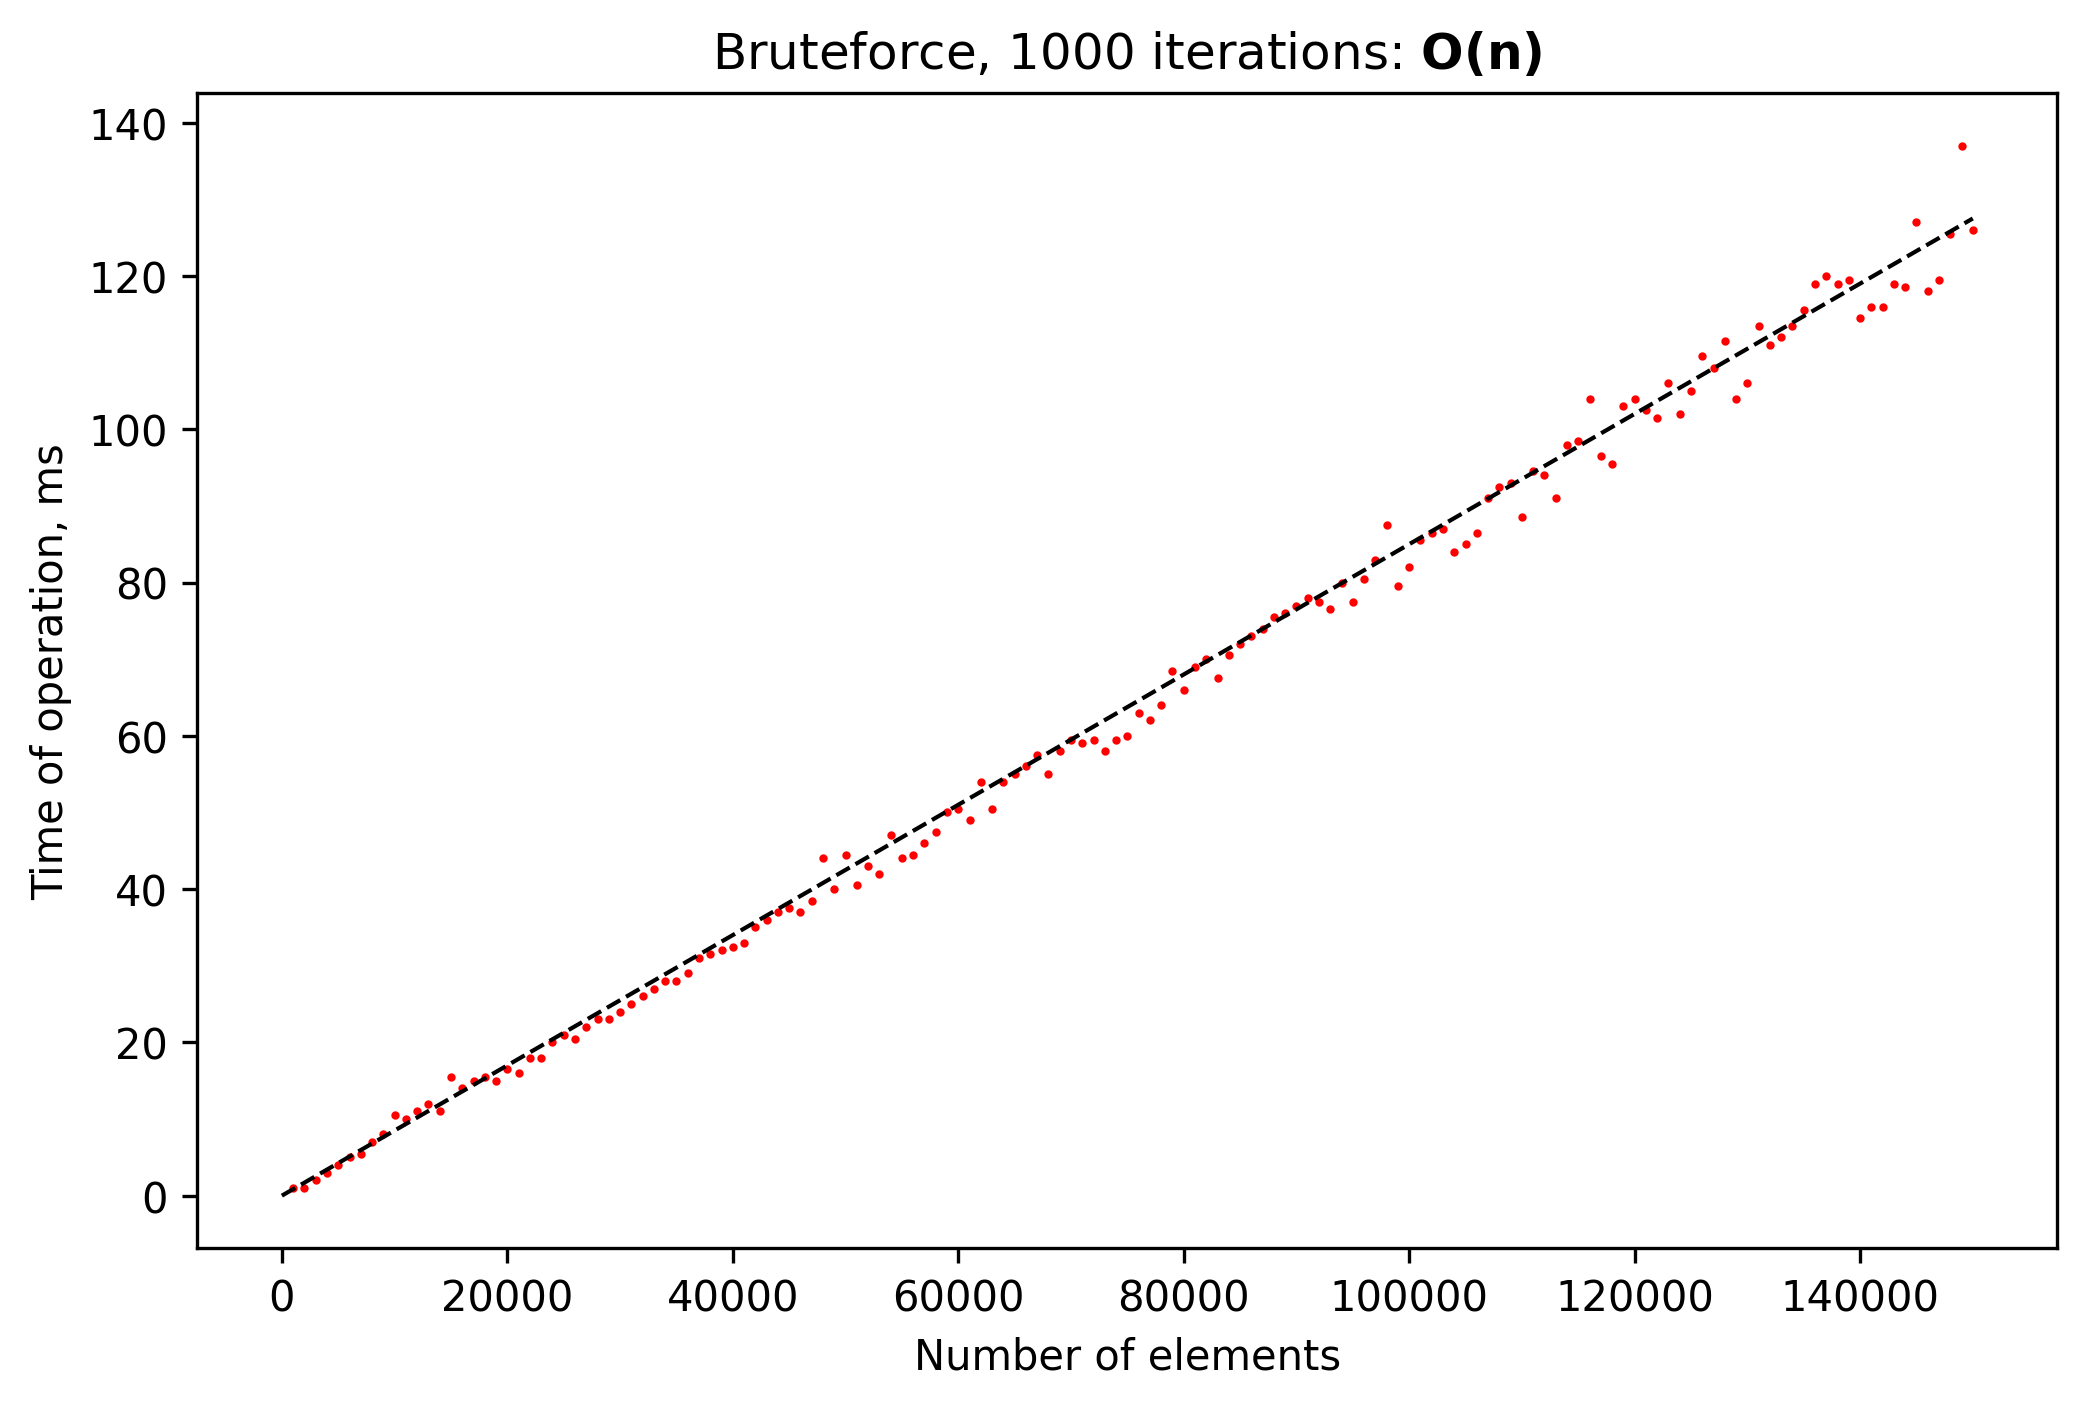

In [85]:

ls = np.linspace(0, 150000, 100)
plt.xlabel(r'Number of elements')
plt.ylabel(r'Time of operation, ms')
plt.plot(df['size'], df['time'], 'or', ms=1)
plt.title('Bruteforce, 1000 iterations: $\mathbf{O(n)}$')
k=85e-5
plt.plot(ls, k*ls, '--k', lw=1)

# Binary search

In [96]:
df = pd.read_csv("bisearch/bisearch.csv", delimiter = ';')
df['time'] = df.apply(lambda x: x[1:5].median(), axis=1)
df

,size,time1,time2,time3,time4,time5,time
0,1,4,4,4,4,4,4.0
1,2,8,8,9,8,8,8.0
2,3,8,8,8,9,8,8.0
3,4,12,12,12,12,12,12.0
4,5,12,12,12,13,17,12.0
...,...,...,...,...,...,...,...
60,219339,101,86,77,77,81,81.5
61,263207,83,89,93,87,88,88.0
62,315849,89,79,81,82,108,81.5
63,379019,98,80,80,80,87,80.0


In [97]:
df['lnsize'] = df.apply(lambda x: log10(x['size']), axis=1)

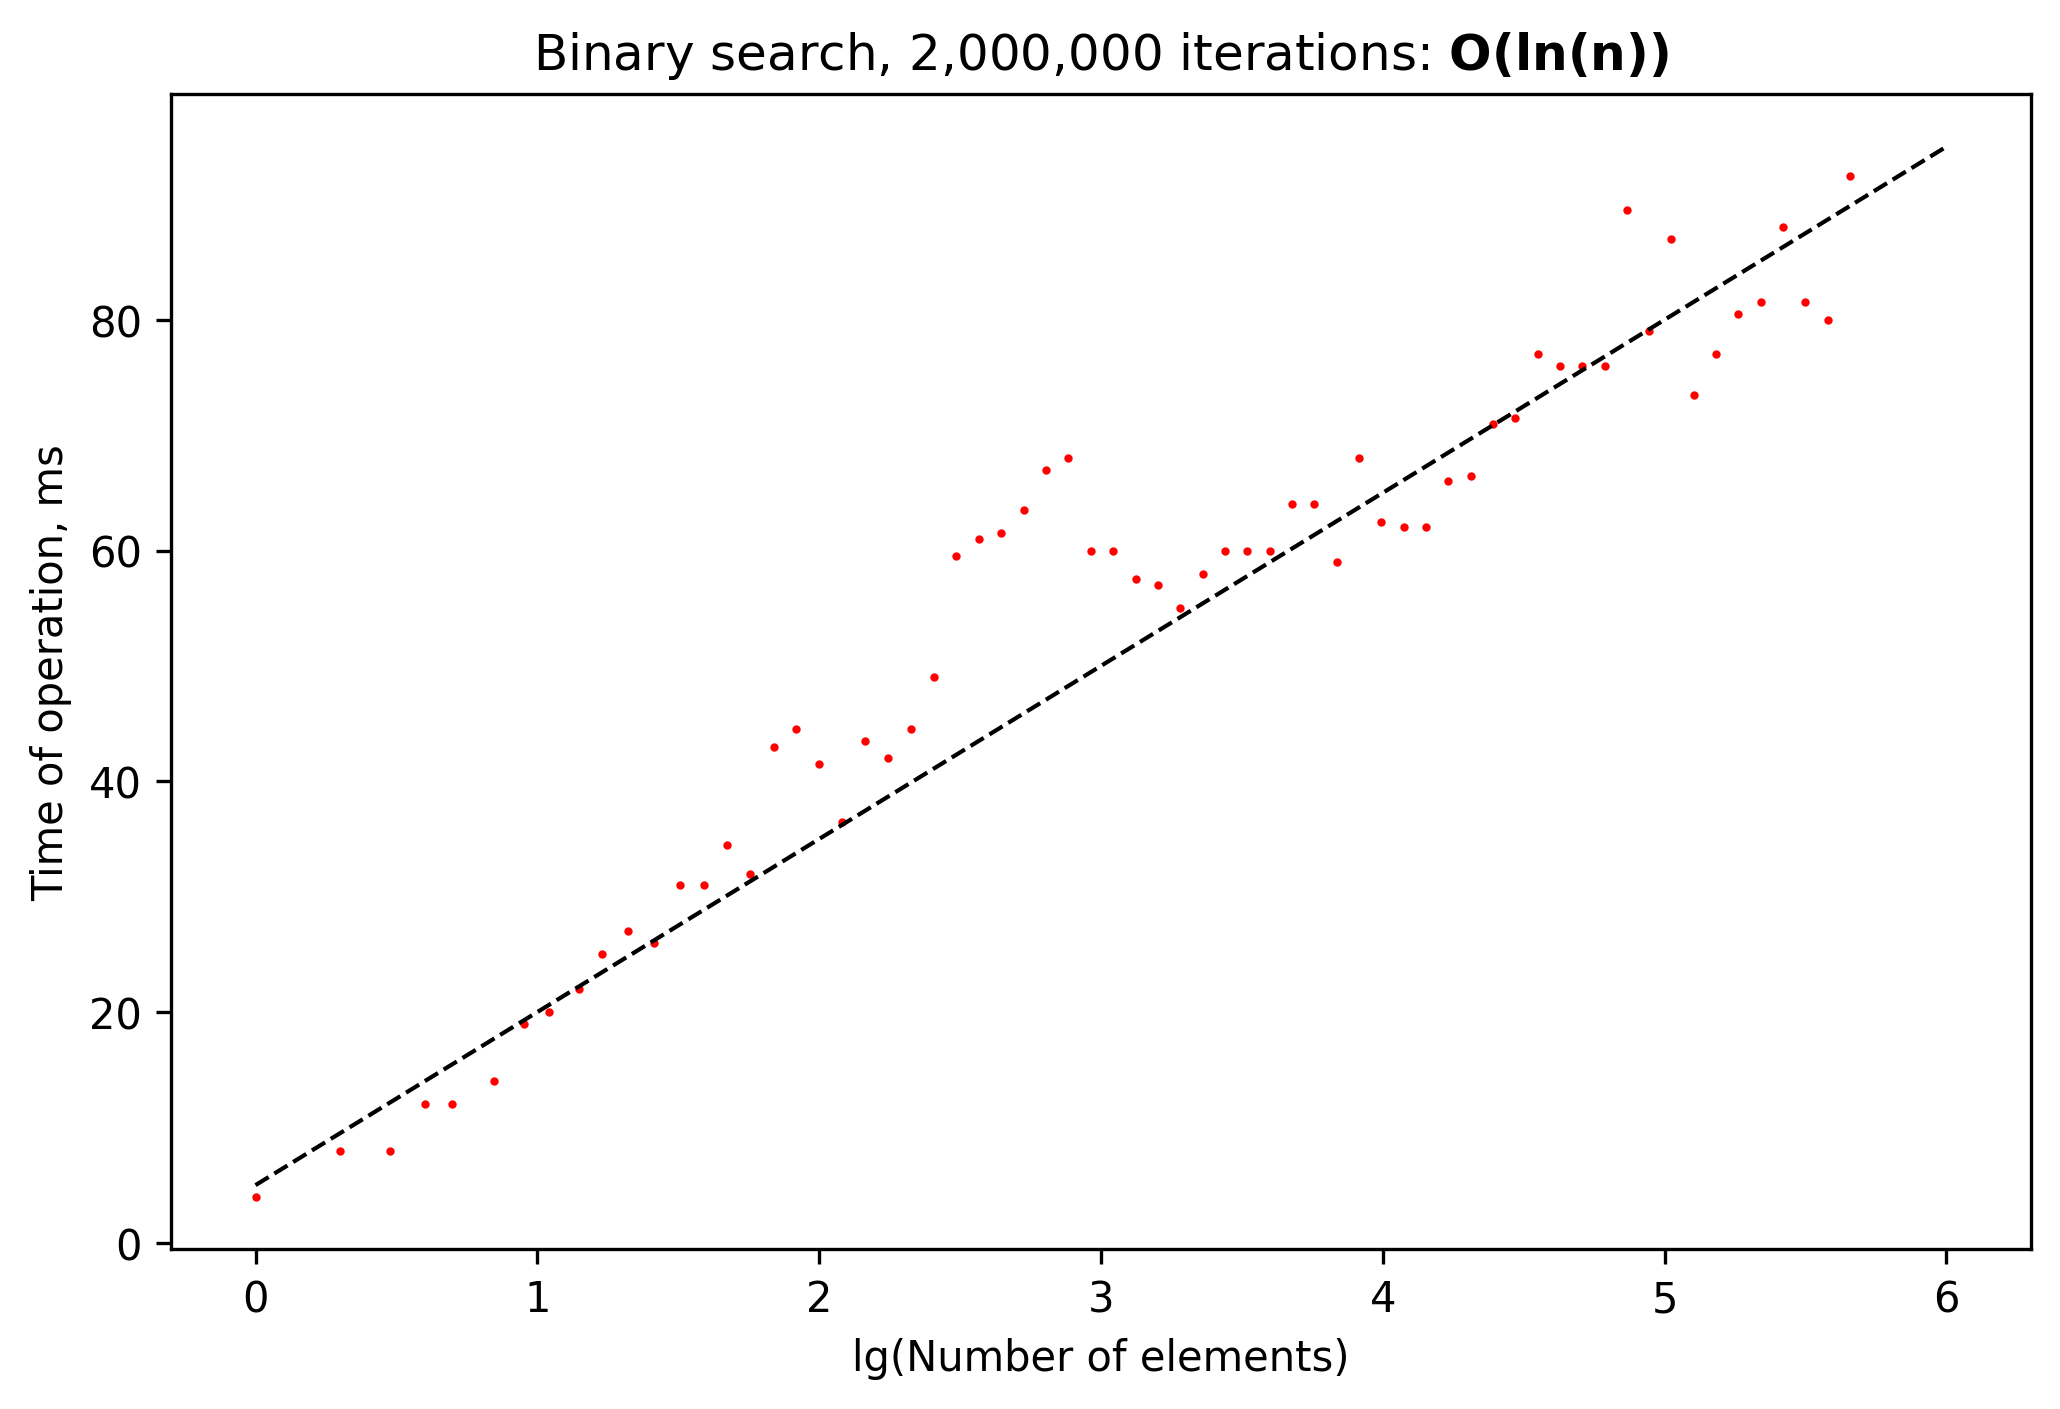

In [98]:
ls = np.linspace(0, 6, 100)
plt.xlabel(r'lg(Number of elements)')
plt.ylabel(r'Time of operation, ms')
plt.plot(df['lnsize'], df['time'], 'or', ms=1)
plt.title("Binary search, 2,000,000 iterations: $\mathbf{O(ln(n))}$")
k=15
b=5
plt.plot(ls, k*ls+b, '--k', lw=1)

# Sum of two

In [157]:
df = pd.read_csv("sumtwo/sumtwo.csv", delimiter = ';')
df['time'] = df.apply(lambda x: x[1:5].median(), axis=1)

In [158]:
df= df[df.time!=0.0]
df['lnsize'] = df.apply(lambda x: log10(x['size']), axis=1)
df['lntime'] = df.apply(lambda x: log10(x['time']), axis=1)

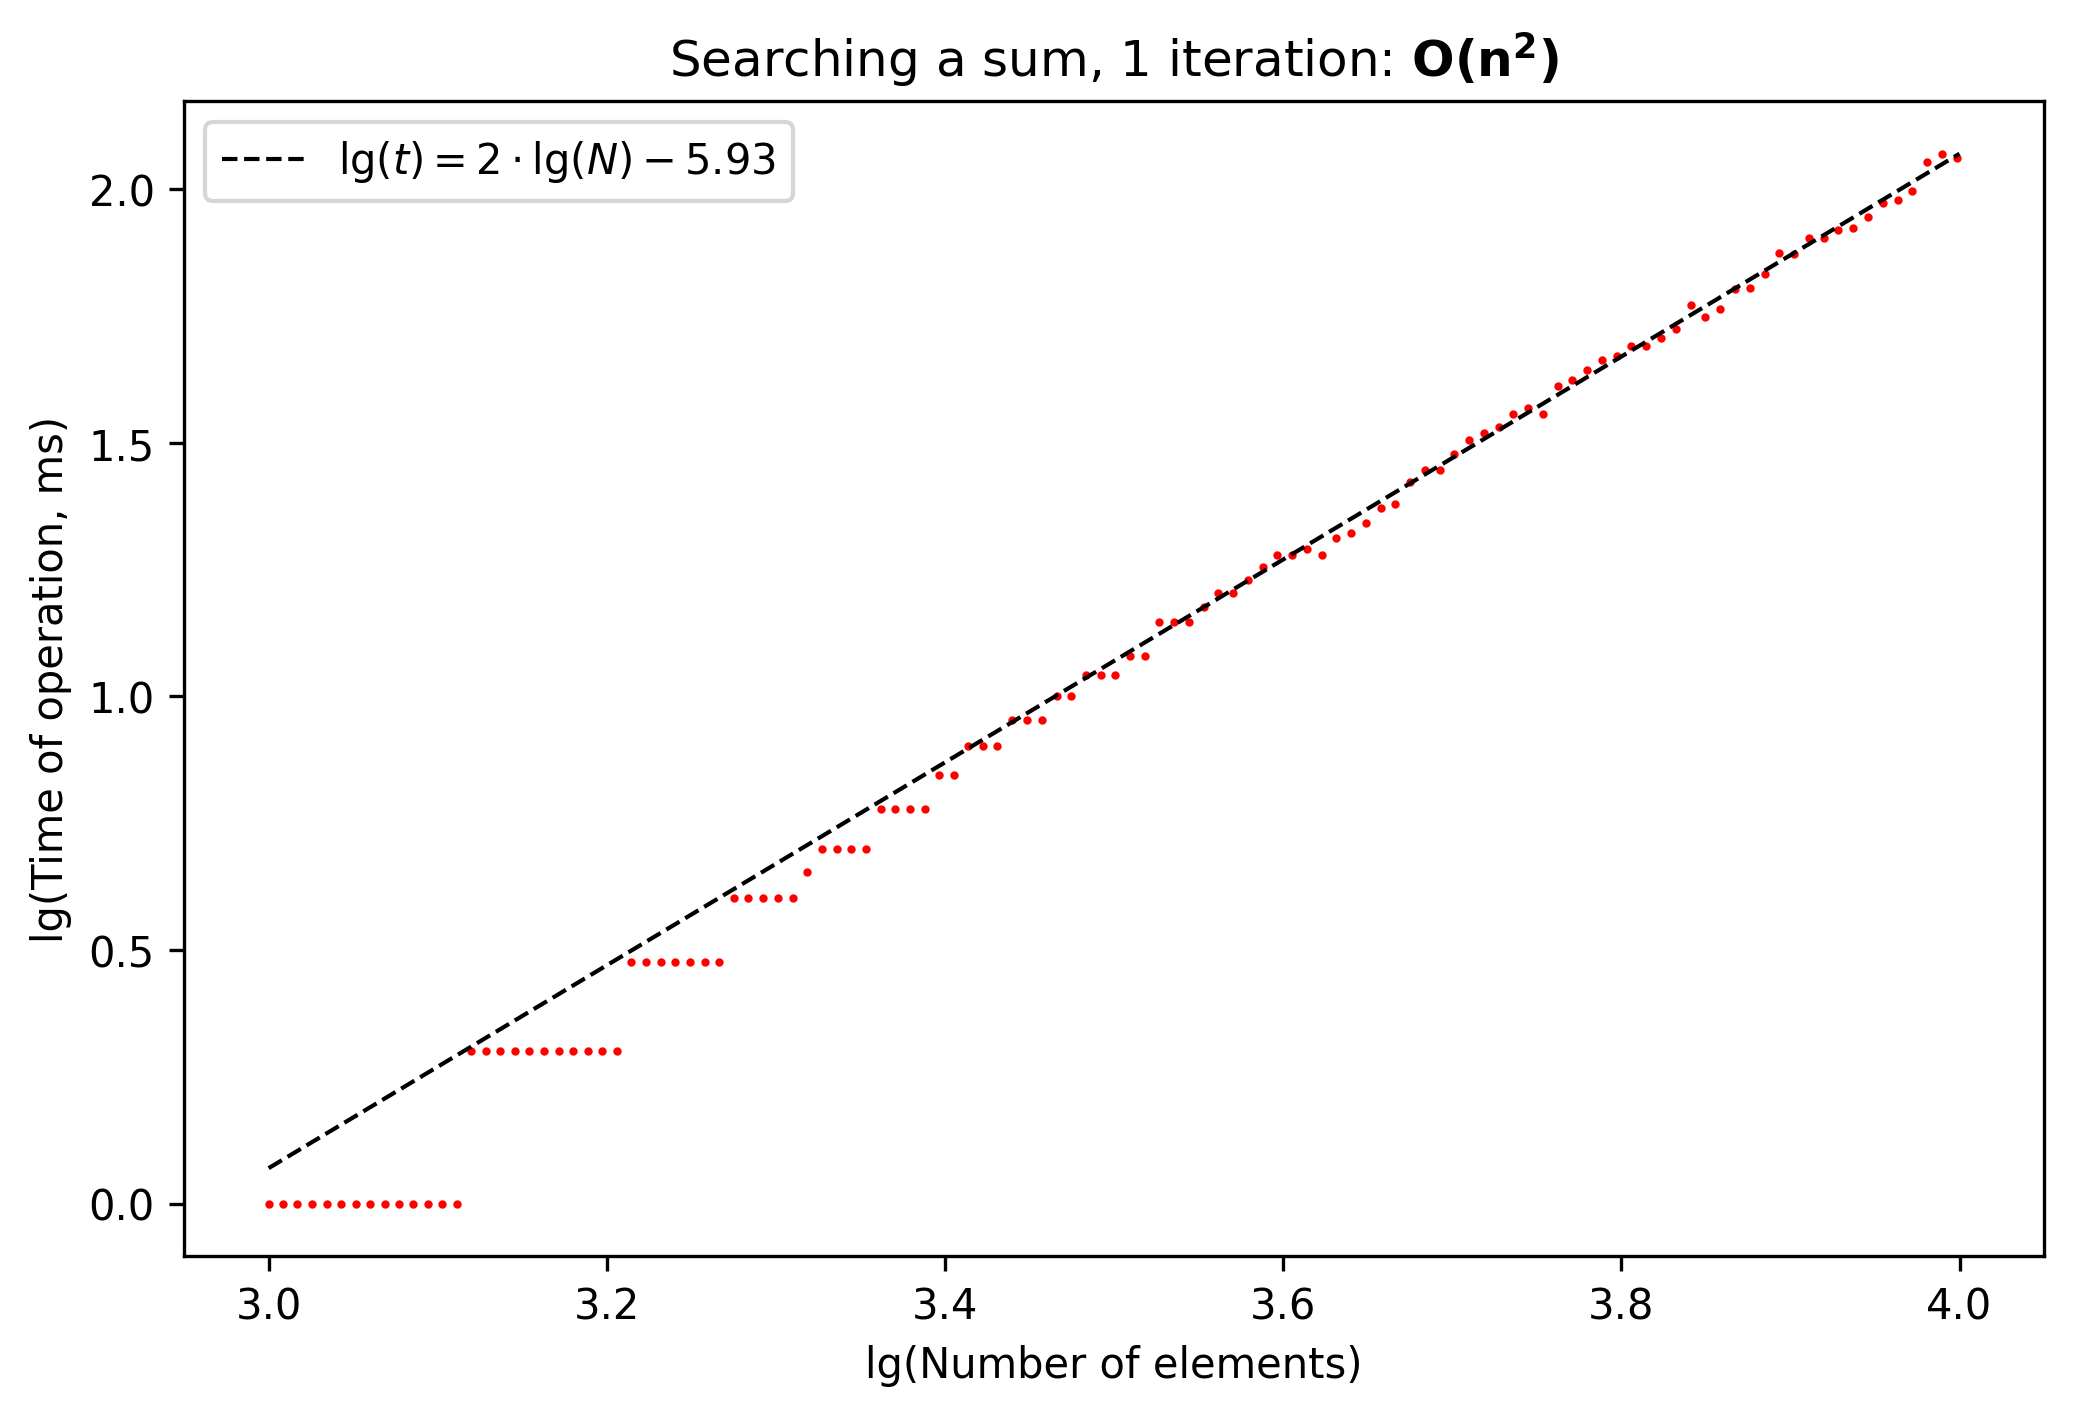

In [159]:
ls = np.linspace(3, 4, 100)
plt.xlabel(r'lg(Number of elements)')
plt.ylabel(r'lg(Time of operation, ms)')
plt.plot(df['lnsize'], df['lntime'], 'or', ms=1)
plt.title("Searching a sum, 1 iteration: $\mathbf{O(n^2)}$")
k=2
b=-5.93
plt.plot(ls, k*ls+b, '--k', lw=1, label = r'$\lg(t) = 2\cdot \lg(N) - 5.93$')
plt.legend()

# Sum of two [SORTED]

In [165]:
df = pd.read_csv("sumtwo-sorted/sumtwo-sorted.csv", delimiter = ';')
df['time'] = df.apply(lambda x: x[1:5].median(), axis=1)

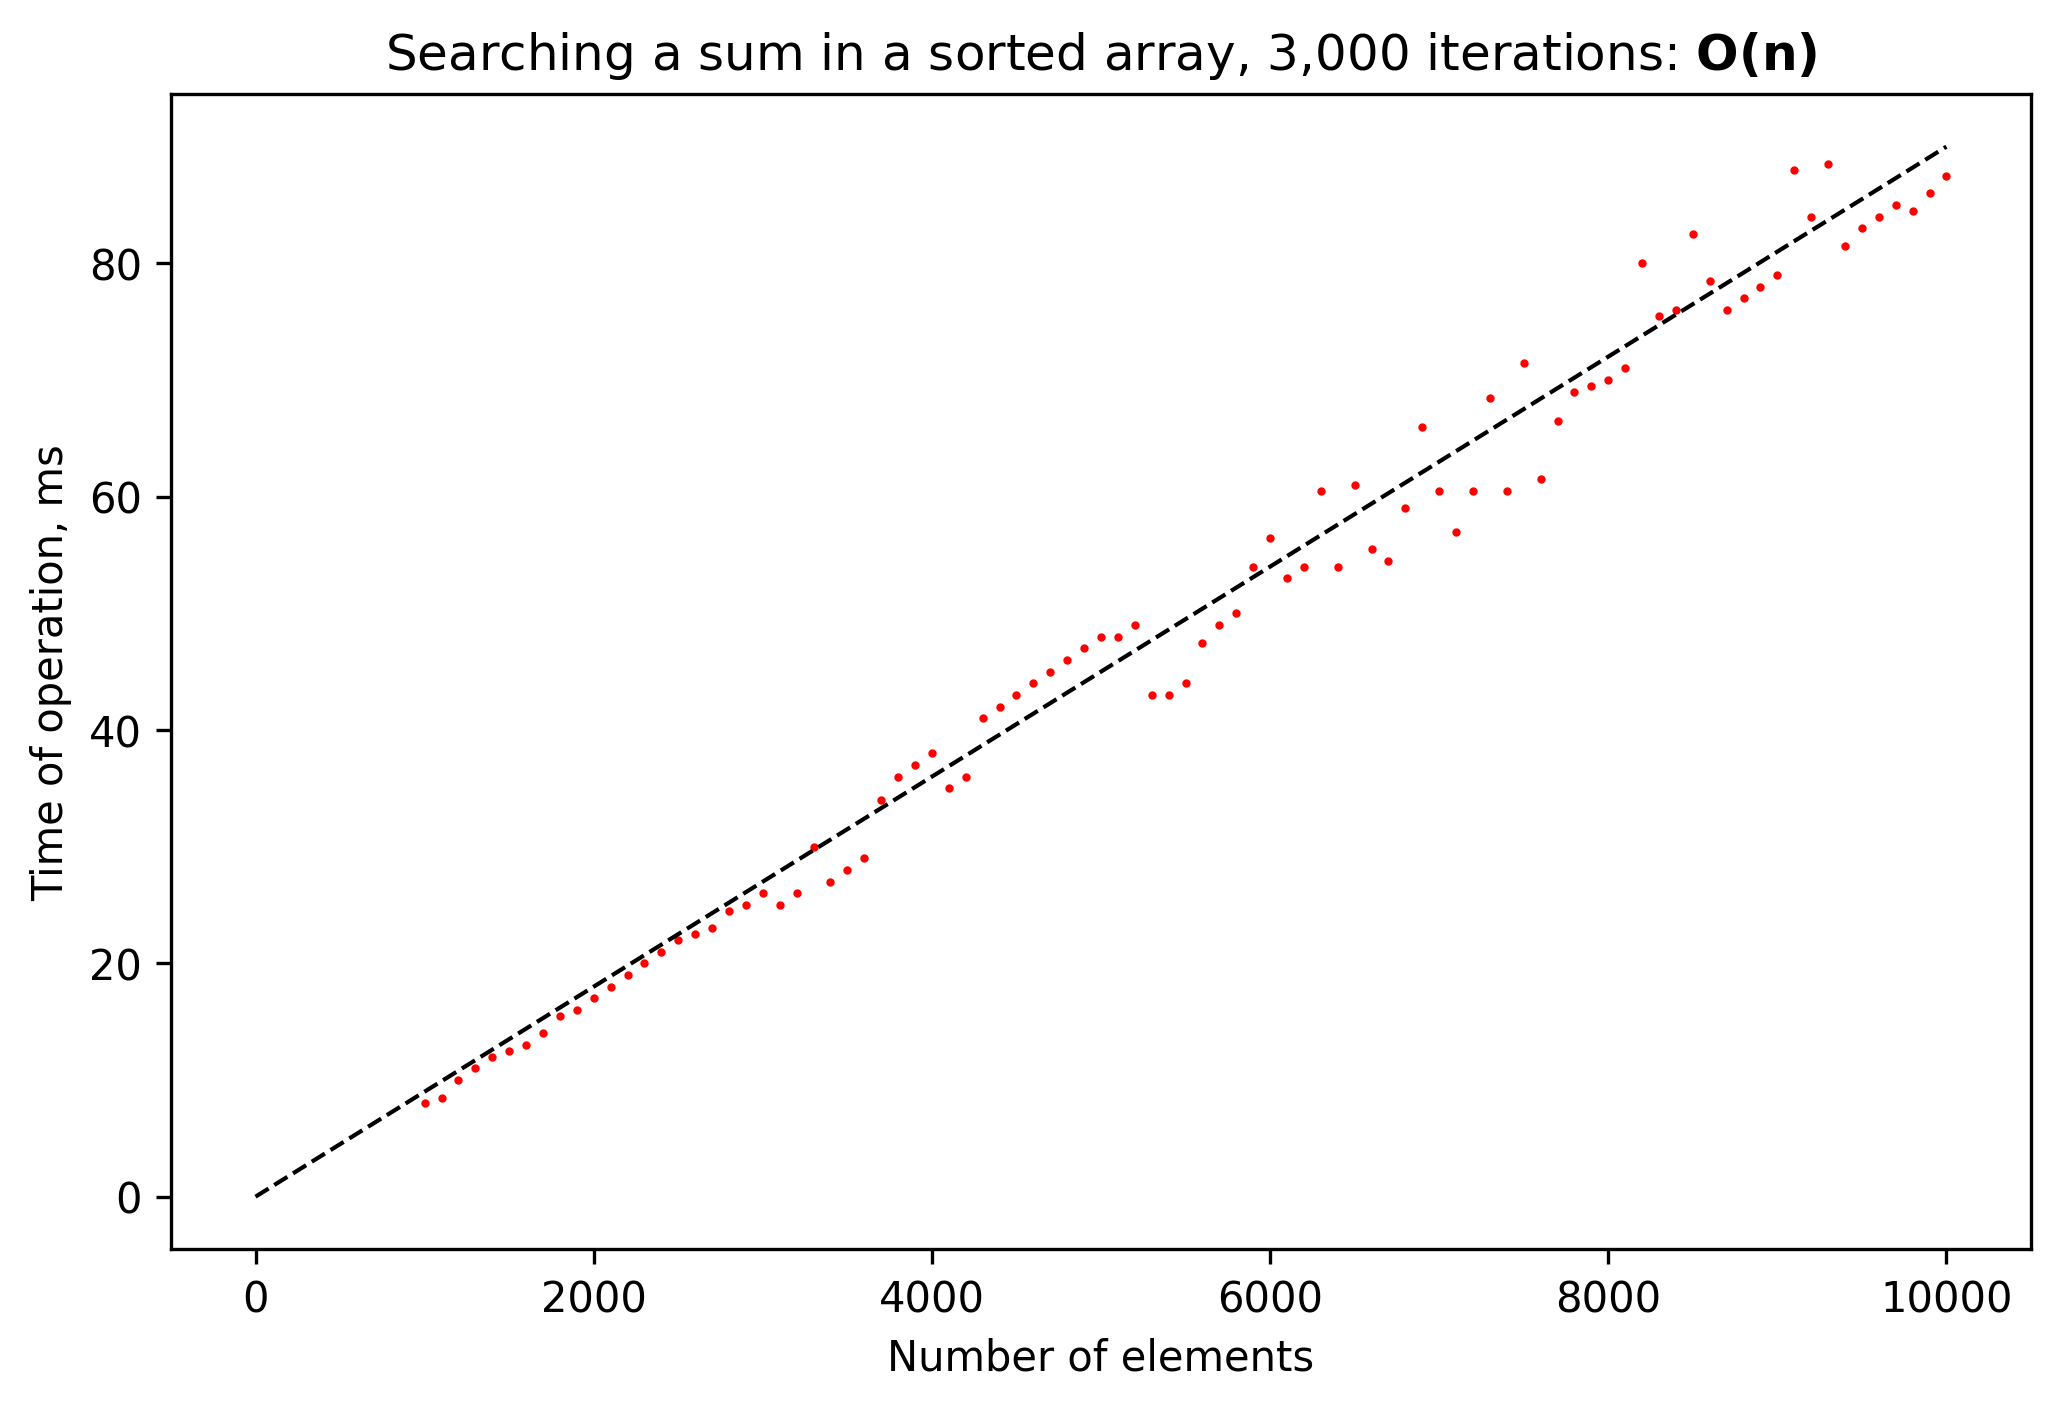

In [172]:
ls = np.linspace(0, 10000, 100)
plt.xlabel(r'Number of elements')
plt.ylabel(r'Time of operation, ms')
plt.plot(df['size'], df['time'], 'or', ms=1)
plt.title("Searching a sum in a sorted array, 3,000 iterations: $\mathbf{O(n)}$")
k=9.0e-3
plt.plot(ls, k*ls, '--k', lw=1)